In [3]:
from CreateTable import create_df

df_table = create_df()
df_table

C:\Users\brill\Documents\GitHub\ArtificialTouch\CreateTable.py:28: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(exponential_decay, time_touch, fz_touch, p0=[fz_touch[0] - fz_touch[-1], 0.4, fz_touch[-1]])
C:\Users\brill\Documents\GitHub\ArtificialTouch\CreateTable.py:28: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(exponential_decay, time_touch, fz_touch, p0=[fz_touch[0] - fz_touch[-1], 0.4, fz_touch[-1]])


In [1]:
from DataParser import get_df_list
from Filter import filter_dataframes
from Interpolate import cubic_interpolation_padded
from AE import AE, get_auto
from sklearn.preprocessing import StandardScaler
from Scaler import preprocess_signals

# dfs containing only the signals captured when the machine is touching
df_list = get_df_list()
filter_dataframes(df_list, win_size=20, alpha=8)
interpolated = cubic_interpolation_padded(df_list, 0.003)

autoencoder = AE(*get_auto())
autoencoder.compile(optimizer='adam', loss='mse')

scaler = StandardScaler()
# Standard scale the two features and stack into a np array
X_train, all_signals = preprocess_signals(interpolated, scaler)

autoencoder.load_weights('weights/normalized2bis.weights.h5')
X_train_encoded = autoencoder.encoder.predict(X_train)

52
3357
  1/205 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step

C:\Users\brill\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [4]:
df_table2 = df_table.drop(index=[52, 3357])
df_table2 = df_table2.reset_index(drop=True)

df_table2['latent_space'] = list(X_train_encoded)
df_table2

,Source,posx,posy,posz,Stiffness,Tau,Force Steady State,Power,Entropy,F_area,...,Dominant Frequency,Upstroke,Downstroke,Fz,t,Fz_s,posz_s,Touching,label,latent_space
0,1,99.999532,99.999410,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",0.010626,0.548227,0.910061,0.604483,-134.031800,2.095533,...,0.0,5.892975,-6.402780,"[-0.0014070439683014145, 0.0018007246640955885...","[0.0, 0.004015000000208602, 0.0079880000000684...","[-0.0006114894767172205, -0.000743588448914541...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,"[-5.7123623, 8.86466, 2.104714, 8.945123, 3.77..."
1,10,99.999379,101.999557,"[82.994, 83.0, 82.999, 82.999, 82.999, 82.999,...",0.010723,0.371576,0.903571,0.594984,-136.786274,2.096959,...,0.0,5.745072,-6.061465,"[0.003445151530539986, -0.003076314516409225, ...","[0.0, 0.004148999999870284, 0.0080599999998867...","[0.0016480598802832767, 0.0018431934838176152,...","[82.99741933738233, 82.99777797797802, 82.9982...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,"[-3.7266185, 5.431301, 1.3273866, 5.726879, 1...."
2,100,95.999443,95.999442,"[82.999, 82.999, 82.999, 82.999, 83.0, 82.999,...",0.010597,0.378951,0.885267,0.572972,-129.032342,2.072278,...,0.0,5.720860,-5.752633,"[-0.006577082270227377, -0.006350286329874702,...","[0.0, 0.004136000000016793, 0.0102300000000923...","[-0.0057295994480419206, -0.005263917227931921...","[82.9990289806933, 82.99904129175867, 82.99902...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-1.6878014, 2.1428015, 0.7329273, 2.736927, 1..."
3,1000,83.999581,107.999765,"[82.999, 82.999, 83.0, 83.0, 82.999, 82.999, 8...",0.010736,0.337364,0.887234,0.582705,-117.719359,2.089409,...,0.0,6.187840,-5.591774,"[-0.001755751899963114, -0.002512269774273971,...","[0.0, 0.004297999999835156, 0.0082790000005843...","[-0.0025734385511381143, -0.002679746134571006...","[82.99927736948837, 82.99933164314778, 82.9993...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.8591741, -0.38098565, -0.4503395, -0.10756..."
4,1001,107.999578,83.999643,"[82.999, 82.999, 82.999, 82.999, 82.999, 82.99...",0.010753,0.317956,0.885576,0.565048,-118.550880,2.089582,...,0.0,4.463865,-5.622952,"[0.000985341836587311, 0.005157799125067794, 0...","[0.0, 0.004339000000072701, 0.0080390000002807...","[0.002446546717839288, 0.002458072131499022, 0...","[82.9989988596368, 82.99899429387787, 82.99897...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-1.6953653, 0.28460604, 0.8197098, -2.5335112..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6554,995,88.999561,113.999279,"[82.999, 82.999, 82.999, 82.999, 82.999, 83.0,...",0.010810,0.356204,0.895225,0.580655,-124.837156,2.122185,...,0.0,4.565075,-5.217574,"[-0.0014774965903924723, -0.001666919230186386...","[0.0, 0.004420999999638298, 0.0082279999996899...","[-0.0006776000726839354, -0.000521691812658428...","[82.99901084643496, 82.99902629194379, 82.9990...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-1.0625417, -0.2050438, -0.46391353, 0.246394..."
6555,996,85.999387,110.999571,"[83.0, 83.0, 82.999, 82.999, 82.999, 82.999, 8...",0.010775,0.347424,0.897274,0.590281,-134.676104,2.111275,...,0.0,5.379094,-5.028950,"[0.0038783554757174502, 0.00095848064948173, 0...","[0.0, 0.004013000000668399, 0.0099510000000009...","[0.002052711412761231, 0.001751896088023311, 0...","[82.99967125945963, 82.99955461209667, 82.9993...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-1.1477555, -0.5064922, -0.6122205, -0.001262..."
6556,997,88.999567,85.999389,"[83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 82.999, 8...",0.010738,0.318427,0.886011,0.573870,-122.913003,2.086319,...,0.0,5.397690,-5.752829,"[-0.00031748047495079953, -0.00406375007937011...","[0.0, 0.0039109999997890554, 0.008046999999351...","[-0.0013369163089309646, -0.001187551104991275...","[82.999995637143, 82.99998274342875, 82.999936...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [16]:
print(len(df_table2["posz_s"][4]))

1869


Silhouette Score: -0.0744
Davies-Bouldin Index: 5.7199
Calinski-Harabasz Index: 563.9096


C:\Users\brill\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


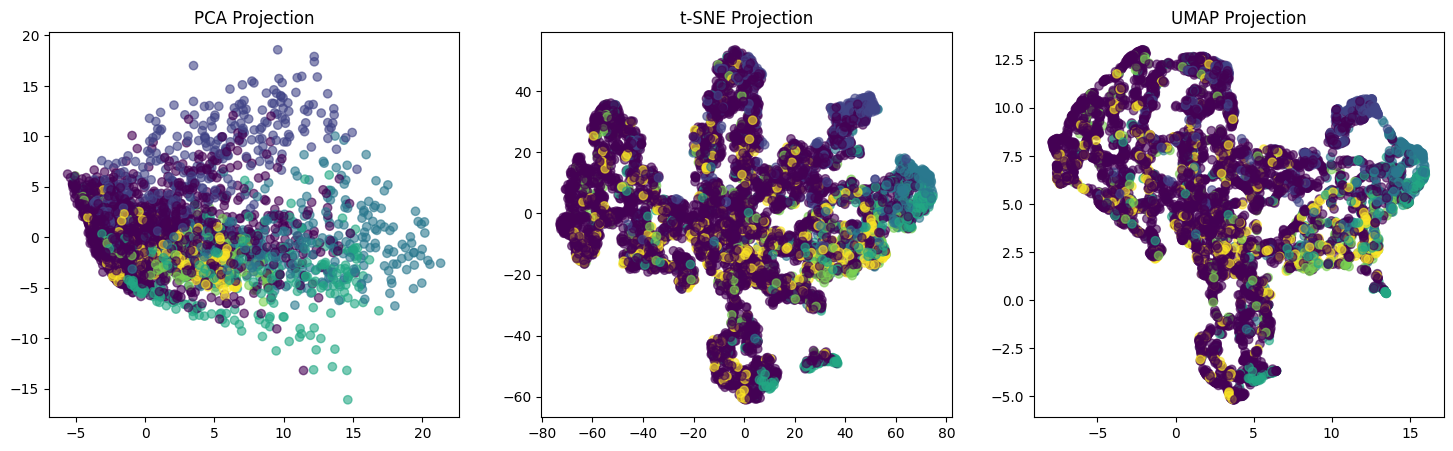

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Clustering with KMeans (expected 6 clusters)
# n_clusters = 6
# kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
# labels = kmeans.fit_predict(X_train_encoded)

labels = list(df_table2['label'])

# Compute Clustering Metrics
silhouette_avg = silhouette_score(X_train_encoded, labels)
db_index = davies_bouldin_score(X_train_encoded, labels)
ch_index = calinski_harabasz_score(X_train_encoded, labels)

print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Calinski-Harabasz Index: {ch_index:.4f}")

# Dimensionality Reduction
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_encoded)

# t-SNE
tsne = TSNE(n_components=2, perplexity=60, random_state=42)
X_tsne = tsne.fit_transform(X_train_encoded)

# UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_train_encoded)

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
axes[0].set_title("PCA Projection")

axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', alpha=0.6)
axes[1].set_title("t-SNE Projection")

axes[2].scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='viridis', alpha=0.6)
axes[2].set_title("UMAP Projection")

plt.show()
